In [1]:
import filters
import pickle
import datetime
import intervaltree as iv

In [2]:
# passes = pickle.load(open('passes_new.pkl', 'rb'))

In [3]:
#fact = filters.passes_per_gs(passes, 'FACT')
#oscar = filters.passes_per_sat(passes, 'OSCAR 7 (AO-7)')
#both = filters.passes_gs_sat(passes, 'FACT', 'OSCAR 7 (AO-7)')

In [4]:
import sys

#adds folder to the search path for 'import'
sys.path.append('../python-files')

In [5]:
import db

tree = db.getpasses('allpasses.db', gs='KB9JHU')
print(len(tree))

# '%' character in SQL means 'any 0 or more characters'
# lazy way instead of using the exact full string
tree = db.getpasses('allpasses.db', gs='KB9JHU', sat='%AO-7%')
print(len(tree))

96441


3246


In [25]:
# calc_access_time() function definition
def calc_access_time(passtree):
    """Calculates Access Time in seconds/day.

    Arguments:
    passtree - interval tree containing all intervals for access time
    """
    # Find total access time for tree
    #     Including: one gs tree, one sat tree, one gs/one sat tree
    accesstime_total = 0
    for item in passtree:
        accesstime_total = accesstime_total + item.data.duration


    # Find access time per day for tree
    if len(passtree) > 0:

        # Including: one gs tree, one sat tree, one gs/one sat tree
        start, end = passtree.begin(), passtree.end()

        # get day of first pass, start at midnight
        q = start.replace(hour=0, minute=0, second=0, microsecond=0)

        # get day of last pass, end at midnight
        c = end.replace(hour=0, minute=0, second=0, microsecond=0)

        # define one day as timedelta
        day = datetime.timedelta(days=1)

        accesstime_days = []
        while q <= c:
            dayend = q + day

            # TODO: chop bug workaround
            try:
                new_tree = passtree.search(q, dayend)
                new_tree.chop(q, dayend)
            except:
                new_tree = passtree.search(q, dayend)
                # accept the overhangs

            access = 0
            for item in new_tree:
                access = access + item.data.duration
            accesstime_days.append(access)
            q = dayend

    return accesstime_total, accesstime_days


In [26]:
total, day_total = calc_access_time(tree)

In [27]:
print(total)
print(day_total)
print(len(day_total))

2061955.8406699984
[6196.943033999999, 5685.3233, 5581.673176, 5534.804601, 5813.2824709999995, 5917.695073999999, 5777.43845, 5535.883331999999, 5492.093043, 5997.853443000001, 5805.745294, 6144.973489000001, 5326.639493000001, 5947.331663000001, 5522.313093000001, 6262.700376, 5706.103193999999, 5821.984401, 5578.498237, 5728.3182480000005, 5890.674260999999, 5831.842829, 5582.730873, 5615.102122, 5672.671472999999, 5818.295443999999, 6098.553921000001, 5439.659624999999, 5973.119293, 5250.4593079999995, 6226.629352999999, 5627.409838, 5901.598862, 5485.572577, 5696.3962089999995, 5786.690746, 5815.812810999999, 5560.998893, 5507.339789, 5492.914444, 5757.296759, 5931.194962, 5471.825508, 5752.205859, 5292.93772, 6113.373464, 5449.0321, 5901.456022, 5281.811197999999, 5734.437216, 5625.455587, 5771.58355, 5498.0643070000015, 5444.055655, 5422.806062, 5640.755309, 5763.02509, 5542.459553999999, 5660.450397, 5302.649858, 5912.614979, 5536.39563, 6010.163216000001, 5179.594002, 5737.262

In [9]:
import db
a_tree = db.getpasses('allpasses.db', gs='KB9JHU')

In [10]:
total, day_total = calc_access_time(a_tree)

In [11]:
print(total)
print(day_total)
print(len(day_total))

43048701.74046362
[120486.044392, 119781.00450100006, 117118.46198399997, 118181.80294200001, 120605.70220499997, 123412.385351, 122840.63775799998, 118420.80031799992, 119976.97621899999, 120870.98988599991, 121484.70609300002, 118747.01392299995, 121629.804834, 125322.6141860001, 123270.80335700006, 120600.33168500011, 117933.87158199989, 118752.77788899998, 118836.040669, 124622.466673, 122536.73378200008, 120301.7836279999, 122172.45822999999, 122717.14538000007, 119324.90612200007, 121750.32687499998, 119242.58400199999, 121623.05128500002, 123221.26668100004, 122922.01809900001, 123561.47857099999, 120378.50609700002, 122333.81817799997, 122630.40118200002, 124030.73049599989, 118648.61221300004, 119663.80659599997, 122355.54980600004, 121940.26962199999, 117705.27272500008, 121232.01283100006, 122875.57902699994, 118747.58410699994, 119625.83607600005, 119263.96261700001, 123484.88794399999, 121260.62374100005, 120391.32352199998, 120179.82318299999, 117950.83080599993, 118759.9

In [12]:
tree3 = db.getpasses('allpasses.db', sat='%AO-7%')
total, day_total = calc_access_time(tree3)
print(total)
print(day_total)
print(len(day_total))

31261178.98445309
[86494.92756499993, 88947.217572, 88258.23443800003, 87988.06977999998, 83092.23341400002, 88098.04770800001, 85749.81350999995, 91649.69107300001, 84498.95787900001, 88532.084968, 84214.69836699996, 92170.83809899996, 88319.17067900002, 89106.54525200003, 85096.18165799997, 86454.77216099999, 88793.12089399998, 89224.33056100005, 87778.54195100002, 84588.82420500001, 86627.73217299998, 86606.34221999996, 91125.454444, 84417.70719499997, 88478.89683000004, 81427.613957, 91519.55774999995, 87168.11234500003, 90293.95749199994, 84571.12057500005, 84655.31299199999, 87230.24599700002, 88661.55821400003, 87085.39320000002, 84955.10923499998, 83254.677674, 85447.08729000002, 89503.40095900002, 85020.90692499999, 87404.03772800001, 79477.85022400004, 89037.73115699999, 84564.08201800003, 90429.85430499999, 83663.39549399998, 84502.933718, 83837.33069299997, 87817.995362, 86705.53933199997, 85401.79221400002, 82415.34257299994, 83500.57052199997, 87585.99275100001, 85093.102

In [83]:
# plot_access_time() function definition
def plot_access_time(daily_totals, gs=None, sat=None):
    """Plots Access Time in seconds/day.

    Arguments:
    daily_totals - list of daily sec/day
    gs - Name of gs used for passes (default None)
    sat - Name of sat used for passes (default None)

    If both gs and sat specified, one gs/sat combo
    If gs not specified, means one sat all gs
    If sat not specified, means one gs all sats
    If neither, use generic "gs" and "sat"
    """
    import seaborn
    import matplotlib.pyplot as plt
    spd = 86400  # seconds/day
    numgs = 12  # num ground stations
    numsat = 74  # num sats

    fig = plt.figure(1)
    if gs is None and sat is not None:
        fig.suptitle('%s Access Time for All Ground Stations' % (sat))
        ymax = spd * numgs
    elif sat is None and gs is not None:
        fig.suptitle('All Satellite Access Time for %s Ground Station' % (gs))
        ymax = spd * numsat
    elif sat is None and gs is None:
        fig.suptitle('All Satellite Access time for All Ground Stations')
        ymax = spd * numgs * numsat
    else:
        fig.suptitle('%s Access time for %s Ground Station' % (sat, gs))
        ymax = spd

    s1 = plt.subplot()
    s1.plot(daily_totals, 'b-')
    s1.set_ylim(ymin=0, ymax=2000)
    plt.xlabel('Days from Epoch')
    plt.ylabel('Access time (sec/day)')

    #s2 = plt.subplot(222)
    #s2.plot(daily_totals, 'b-')
    #s2.set_ylim(ymin=0, ymax=ymax)
    #plt.xlabel('Days from Epoch')

    plt.show()

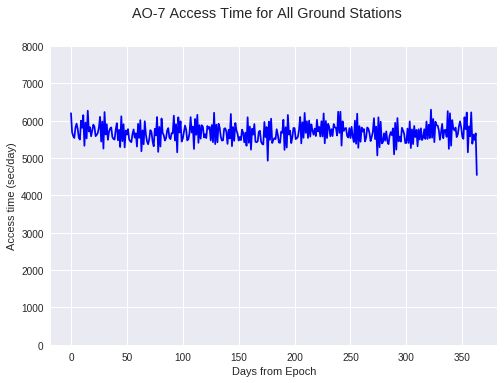

In [63]:
plot_access_time(day_total, sat='AO-7')

In [20]:
ree3 = db.getpasses('allpasses.db', sat='%AO-7%')
total, day_total = calc_access_time(ree3)
print(total)
print(day_total)
print(len(day_total))

31261178.98445309
[86494.92756499993, 88947.217572, 88258.23443800003, 87988.06977999998, 83092.23341400002, 88098.04770800001, 85749.81350999995, 91649.69107300001, 84498.95787900001, 88532.084968, 84214.69836699996, 92170.83809899996, 88319.17067900002, 89106.54525200003, 85096.18165799997, 86454.77216099999, 88793.12089399998, 89224.33056100005, 87778.54195100002, 84588.82420500001, 86627.73217299998, 86606.34221999996, 91125.454444, 84417.70719499997, 88478.89683000004, 81427.613957, 91519.55774999995, 87168.11234500003, 90293.95749199994, 84571.12057500005, 84655.31299199999, 87230.24599700002, 88661.55821400003, 87085.39320000002, 84955.10923499998, 83254.677674, 85447.08729000002, 89503.40095900002, 85020.90692499999, 87404.03772800001, 79477.85022400004, 89037.73115699999, 84564.08201800003, 90429.85430499999, 83663.39549399998, 84502.933718, 83837.33069299997, 87817.995362, 86705.53933199997, 85401.79221400002, 82415.34257299994, 83500.57052199997, 87585.99275100001, 85093.102

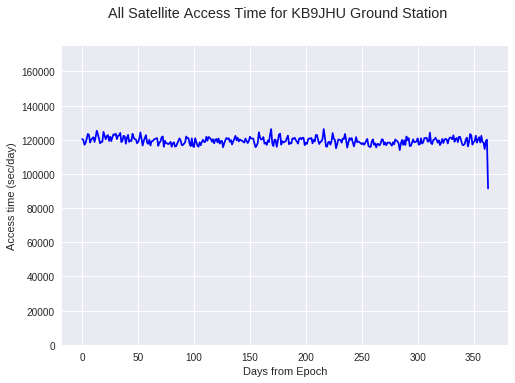

In [74]:
tree_gs = db.getpasses('allpasses.db', gs='KB9JHU')
total_gs, day_total_gs = calc_access_time(tree_gs)
plot_access_time(day_total_gs, gs='KB9JHU')

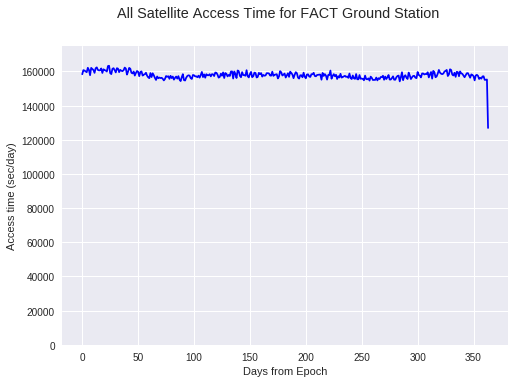

In [75]:
tree_gs = db.getpasses('allpasses.db', gs='FACT')
total_gs, day_total_gs = calc_access_time(tree_gs)
plot_access_time(day_total_gs, gs='FACT')

# of passes: 20928


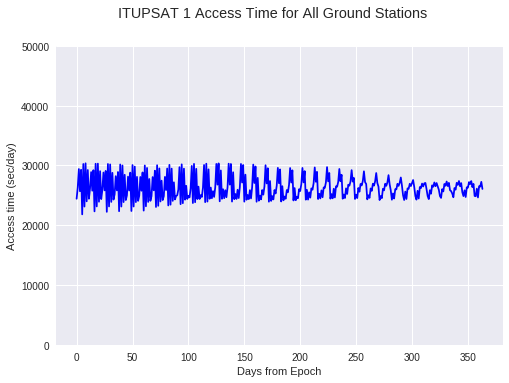

In [77]:
tree_sat = db.getpasses('allpasses.db', sat='ITUPSAT 1')
print('# of passes:', len(tree_sat))
total_sat, day_total_sat = calc_access_time(tree_sat)
plot_access_time(day_total_sat, sat='ITUPSAT 1')

# of passes: 49102


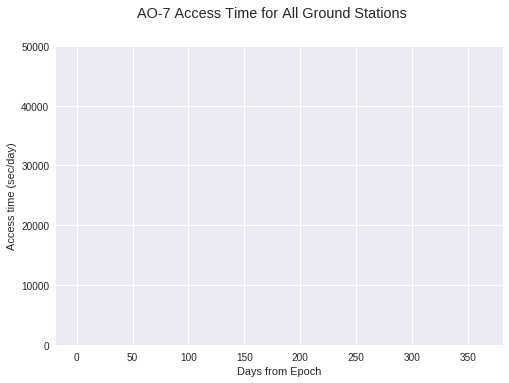

In [78]:
tree_sat2 = db.getpasses('allpasses.db', sat='%AO-7%')
print('# of passes:', len(tree_sat2))
total_sat, day_total_sat = calc_access_time(tree_sat2)
plot_access_time(day_total_sat, sat='AO-7')

# of passes: 21415


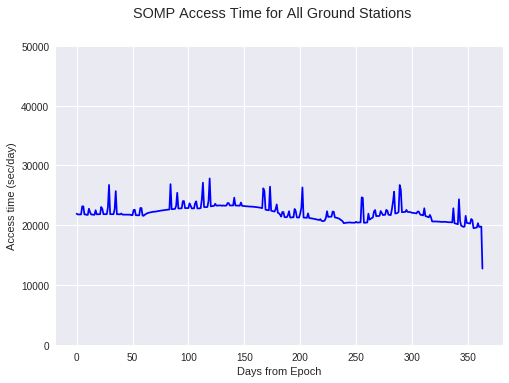

In [79]:
tree_sat3 = db.getpasses('allpasses.db', sat='SOMP')
print('# of passes:', len(tree_sat3))
total_sat, day_total_sat = calc_access_time(tree_sat3)
plot_access_time(day_total_sat, sat='SOMP')

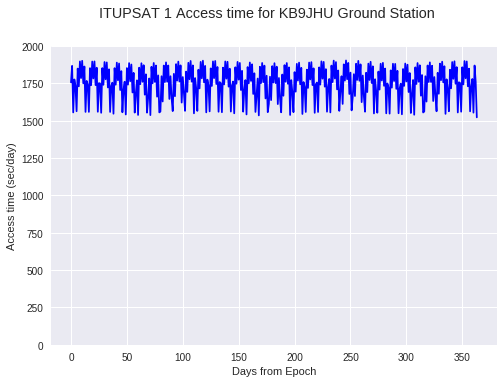

In [84]:
tree_both = db.getpasses('allpasses.db', gs='KB9JHU', sat='ITUPSAT 1')
total_both, day_total_both = calc_access_time(tree_both)
plot_access_time(day_total_both, gs='KB9JHU', sat='ITUPSAT 1')

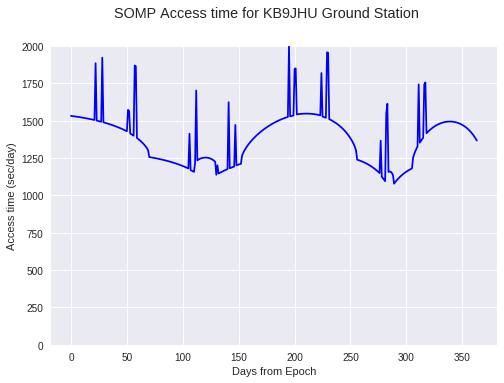

In [86]:
ree_both = db.getpasses('allpasses.db', gs='KB9JHU', sat='SOMP')
total_both, day_total_both = calc_access_time(ree_both)
plot_access_time(day_total_both, gs='KB9JHU', sat='SOMP')